In [85]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [101]:
X,y=make_blobs(n_samples=100,n_features=2,centers=4,random_state=42)

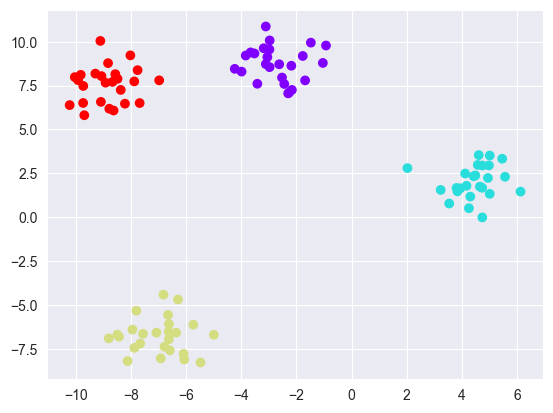

In [102]:
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap='rainbow')

## Heirarical Clustering

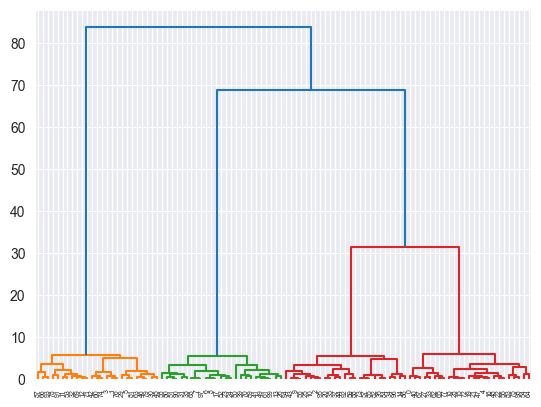

In [128]:
x_scaled=StandardScaler().fit_transform(X)
link=linkage(X,method='ward')
dendrogram(link)
plt.show()

In [149]:
score=[]
for i in range(2,10):
    model=AgglomerativeClustering(n_clusters=i)
    clusters=model.fit_predict(x_scaled)
    score.append([i,silhouette_score(x_scaled,clusters)])
scores=pd.DataFrame(data=score,columns=['n_clusters','silhouette_score'])

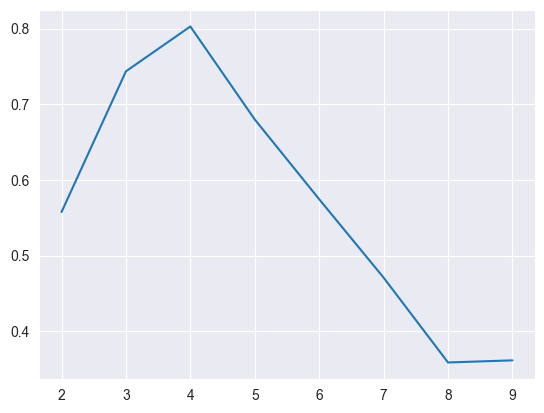

In [151]:
plt.plot(scores['n_clusters'],scores['silhouette_score'])

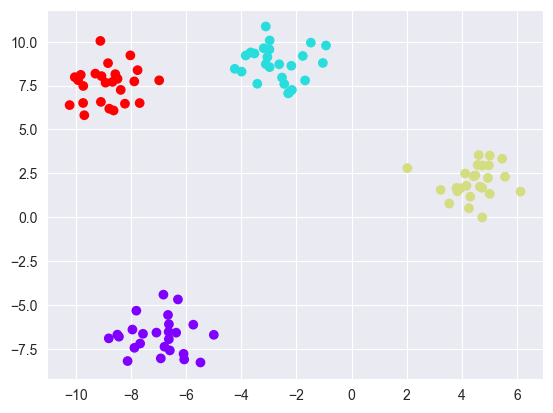

In [105]:
plt.scatter(x=X[:,0],y=X[:,1],c=clusters,cmap='rainbow')

## K-Means

## silhouette_scorem

In [123]:
score=[]
for i in range(2,10):
    model=KMeans(n_clusters=i,init='k-means++',random_state=42)
    labels=model.fit_predict(x_scaled)

    score.append([i,silhouette_score(x_scaled,labels)])

score=pd.DataFrame(data=score,columns=['n_clusters','silhouette_score'])

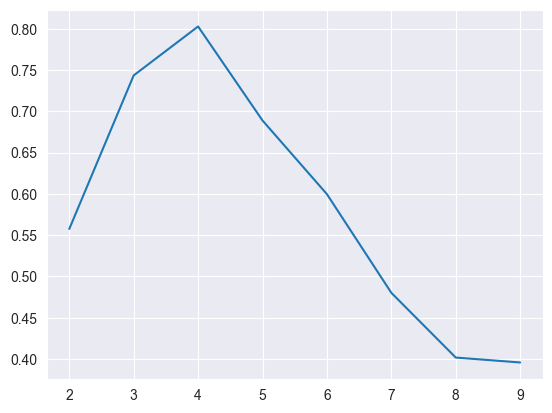

In [124]:
plt.plot(score['n_clusters'],score['silhouette_score'])

## wcssm

In [152]:
wcss=[]
for i in range(2,10):
    model=KMeans(n_clusters=i,init='k-means++',random_state=42)
    labels=model.fit_predict(x_scaled)

    wcss.append([i,model.inertia_])

score=pd.DataFrame(data=wcss,columns=['n_clusters','wcss'])

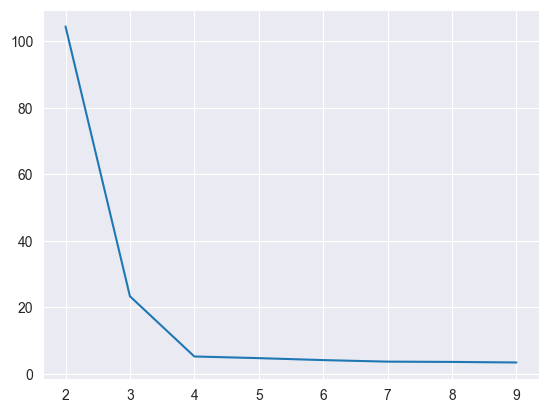

In [153]:
plt.plot(score['n_clusters'],score['wcss'])

## DBSCANm

In [144]:
model=DBSCAN(eps=2,min_samples=5)
labels=model.fit_predict(X)
labels

array([0, 1, 2, 1, 0, 1, 3, 3, 3, 2, 2, 1, 1, 3, 2, 0, 0, 3, 0, 0, 2, 0,
       0, 3, 3, 2, 3, 0, 0, 1, 1, 3, 1, 0, 2, 2, 2, 2, 3, 3, 0, 3, 1, 2,
       2, 1, 1, 0, 0, 3, 3, 3, 3, 1, 0, 0, 2, 2, 3, 2, 1, 3, 0, 1, 0, 0,
       1, 0, 3, 1, 3, 1, 0, 2, 1, 0, 1, 0, 1, 1, 3, 1, 2, 0, 2, 2, 2, 1,
       2, 3, 3, 1, 2, 1, 2, 2, 2, 3, 0, 3])

In [146]:
silhouette_score(X,labels)

0.7937460187892489

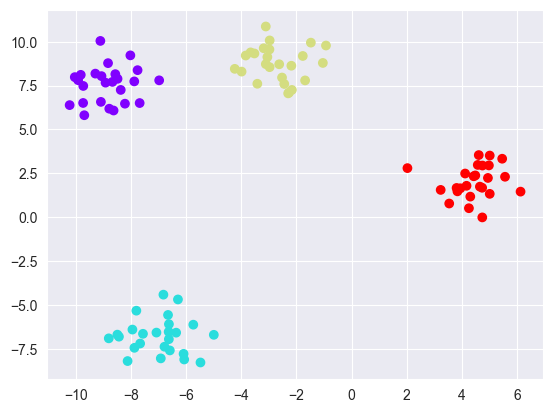

In [145]:
plt.scatter(x=X[:,0],y=X[:,1],c=labels,cmap='rainbow')

In [ ]:
import pan